In [67]:
def max_min_py(array, N):
    max = array[0]
    min = array[0]
    for i in range(1, N):
        if (array[i] > max):
            max = array[i]
        if (array[i] < min):
            min = array[i]
    resultado = [min, max]
    return resultado

In [69]:
%%file max_min_c.c 
#include <stdio.h>
#include <stdlib.h>
float *max_min_c(float *array, int size ){
    float max=0;
    float min= array[0];
    for(int i=0; i<size ; i++){
        if(array[i]>max){
            max=array[i];
        }
        if(array[i]<min){
            min=array[i];
        }
    }
    
    float *resultado = (float * ) malloc(2*sizeof(float));
    return resultado;
}

Overwriting max_min_c.c


In [70]:
! gcc -c max_min_c.c -o max_min_c.o

In [71]:
! gcc -shared max_min_c.c -o max_min_c.so

In [72]:
import ctypes 
import numpy as np
import statistics
import time 
lib = ctypes.CDLL("./max_min_c.so")
lib.max_min_c.argtypes = [np.ctypeslib.ndpointer(dtype= np.float32), ctypes.c_int32  ]
lib.max_min_c.restype = np.ctypeslib.ndpointer(dtype = np.float64)

iteraciones = 50
N = 1024
array = np.random.rand(N )

lista_c = [ ]
lista_py = [ ]

for i in range(iteraciones):
    tic = time.perf_counter()
    lib.max_min_c(array,N)
    toc = time.perf_counter()
    lista_c.append(toc-tic)
    tic = time.perf_counter()
    max_min_py(array,N )
    toc = time.perf_counter()
    lista_py.append(toc-tic)

print(statistics.median(lista_c))
print(statistics.median(lista_py))


1.5396500202768948e-05
0.00015371799963759258


In [73]:
sizes = [ 512 ,1024 ,2048 ,4096 ,8192]
medianas_c = []
medianas_py = []
for j in sizes :
    iteraciones = 50
    array = np.random.rand(j)

    lista_c = [ ]
    lista_py = [ ]

    for i in range(iteraciones):
        tic = time.perf_counter()
        lib.max_min_c(array,j)
        toc = time.perf_counter()
        lista_c.append((toc-tic)*1e6)
        tic = time.perf_counter()
        max_min_py(array,j )
        toc = time.perf_counter()
        lista_py.append((toc-tic)*1e6)
    medianas_c.append(statistics.median(lista_c))
    medianas_py.append(statistics.median(lista_py))

print(medianas_c )
print(medianas_py)

[9.615999260859098, 11.543499567778781, 20.049499653396197, 27.813000087917317, 41.99500017421087]
[71.95549915195443, 140.23299991094973, 297.72800007776823, 578.9850001747254, 1124.430998970638]


Text(0.5, 1.0, 'Tiempo de ejecución pyton vs C ')

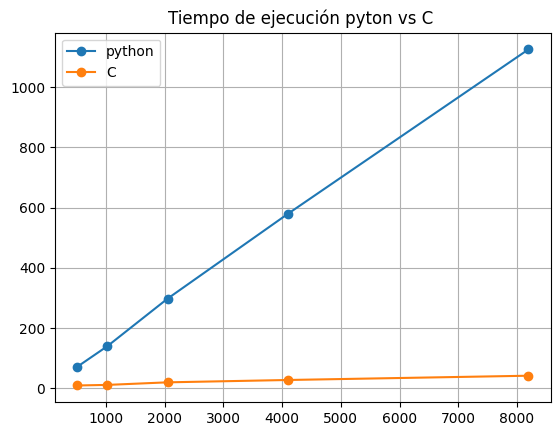

In [77]:
import matplotlib.pyplot as plt

plt.plot(sizes, medianas_py ,"-o")
plt.plot(sizes, medianas_c,"-o")
plt.grid()
plt.legend(["python", "C"])
plt.title("Tiempo de ejecución pyton vs C ")
 # En general , el programa en C es más rapido que el prgrama en Python.

Text(0.5, 1.0, 'SpeedUp tomando de referencia a el programa en python')

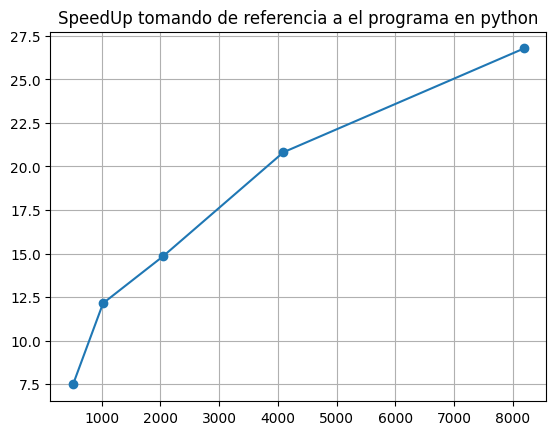

In [78]:
SpeedUp=[]
for i in range(len(medianas_py)):
    SpeedUp.append(medianas_py[i]/medianas_c[i])
    
plt.plot(sizes, SpeedUp ,"-o")
plt.grid()
plt.title("SpeedUp tomando de referencia a el programa en python")

APARTIR DE ACA HACEMOS COPY-PASTE pero con datos double

In [86]:
%%file max_min_c_double.c 
#include <stdio.h>
#include <stdlib.h>
double *max_min_c(double *array, int size ){
    double max=0;
    double min= array[0];
    for(int i=0; i<size ; i++){
        if(array[i]>max){
            max=array[i];
        }
        if(array[i]<min){
            min=array[i];
        }
    }
    
    double *resultado = (double *) malloc(2*sizeof(double));
    return resultado;
}

Overwriting max_min_c_double.c


In [87]:
! gcc -c max_min_c_double.c -o max_min_c_double.o

In [88]:
! gcc -shared max_min_c_double.c -o max_min_c_double.so

In [89]:
import ctypes 
import numpy as np
import statistics
import time 
lib = ctypes.CDLL("./max_min_c.so")
lib.max_min_c.argtypes = [np.ctypeslib.ndpointer(dtype= np.double), ctypes.c_int32  ]
lib.max_min_c.restype = np.ctypeslib.ndpointer(dtype = np.double )

iteraciones = 50
N = 1024
array = np.random.rand(N )

lista_c = [ ]
lista_py = [ ]

for i in range(iteraciones):
    tic = time.perf_counter()
    lib.max_min_c(array,N)
    toc = time.perf_counter()
    lista_c.append(toc-tic)
    tic = time.perf_counter()
    max_min_py(array,N )
    toc = time.perf_counter()
    lista_py.append(toc-tic)

print(statistics.median(lista_c))
print(statistics.median(lista_py))


1.3326999578566756e-05
0.00014416949943552027


In [90]:
sizes = [ 512 ,1024 ,2048 ,4096 ,8192]
medianas_c = []
medianas_py = []
for j in sizes :
    iteraciones = 50
    array = np.random.rand(j)

    lista_c = [ ]
    lista_py = [ ]

    for i in range(iteraciones):
        tic = time.perf_counter()
        lib.max_min_c(array,j)
        toc = time.perf_counter()
        lista_c.append((toc-tic)*1e6)
        tic = time.perf_counter()
        max_min_py(array,j )
        toc = time.perf_counter()
        lista_py.append((toc-tic)*1e6)
    medianas_c.append(statistics.median(lista_c))
    medianas_py.append(statistics.median(lista_py))

print(medianas_c )
print(medianas_py)

[10.987000678142067, 13.824500456394162, 35.02149957057554, 24.318499526998494, 41.060000512516126]
[72.20699990284629, 142.15550072549377, 445.11699979921104, 561.2049990304513, 1113.4055002912646]


Text(0.5, 1.0, 'Tiempo de ejecución pyton vs C ')

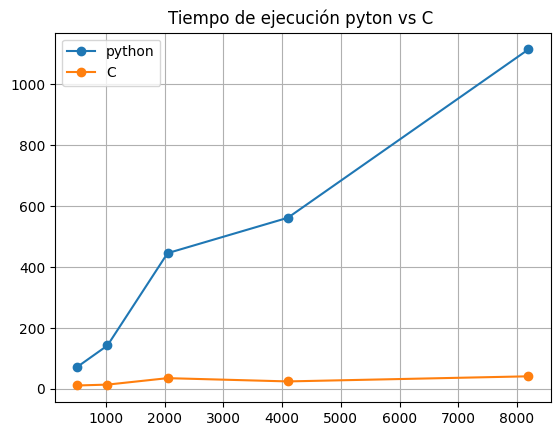

In [91]:
import matplotlib.pyplot as plt

plt.plot(sizes, medianas_py ,"-o")
plt.plot(sizes, medianas_c,"-o")
plt.grid()
plt.legend(["python", "C"])
plt.title("Tiempo de ejecución pyton vs C ")
 # En general , el programa en C es más rapido que el prgrama en Python.

Text(0.5, 1.0, 'SpeedUp tomando de referencia a el programa en python')

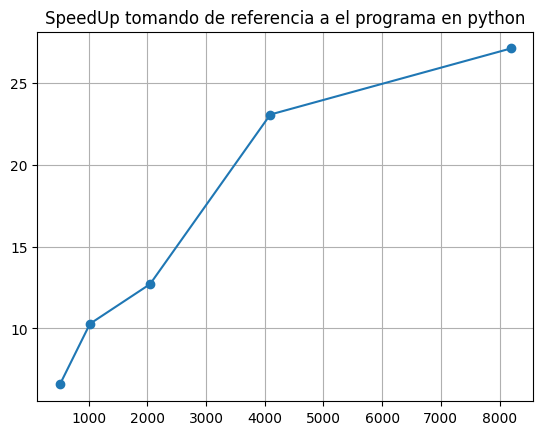

In [92]:
SpeedUp=[]
for i in range(len(medianas_py)):
    SpeedUp.append(medianas_py[i]/medianas_c[i])
    
plt.plot(sizes, SpeedUp ,"-o")
plt.grid()
plt.title("SpeedUp tomando de referencia a el programa en python")